# Video Game Sales

`vgsales.csv` 파일을 읽어 데이터프레임 객체로 변환한 후 아래 문제들을 해결해보시오.

---
### Ref.
https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/

---

문제 1. 데이터 구조 파악
- 데이터의 행 수, 열 수를 출력하시오.
- 결측치가 있는 컬럼을 찾아 개수를 함께 출력하시오.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('vgsales.csv')
df = pd.DataFrame(data)


print(f'데이터의 행 수, 열 수 출력 : {df.shape}')
print(f'데이터의 행 인덱스 정보 : {df.index} / {len(df.index)})')
print(f'데이터의 열 컬럼 정보 : {df.columns} / {len(df.columns)})')

print(df.isnull().sum())

print('---- 결측치가 있는 컬럼과 개수 ----')
# df.isnull().sum()[df.isnull().sum()>0]
df['Year'].isnull().sum()


데이터의 행 수, 열 수 출력 : (16598, 11)
데이터의 행 인덱스 정보 : RangeIndex(start=0, stop=16598, step=1) / 16598)
데이터의 열 컬럼 정보 : Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object') / 11)
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
---- 결측치가 있는 컬럼과 개수 ----


np.int64(271)

문제 2. 연도 (Year) 컬럼 정리
- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도를 각각 구하시오.
- 출시 연도가 없는 데이터를 제거한 새로운 데이터 프레임을 만드시오.

In [2]:
print('--- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도 ---')
print(df['Year'].agg(['min','max']), df['Year'].value_counts().head(1))

print('--- 출시 연도가 없는 데이터를 제거한 데이터 프레임 ---')
def drop_column():
    return df.drop(columns=['Year'])
drop_column()

--- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도 ---
min    1980.0
max    2020.0
Name: Year, dtype: float64 Year
2009.0    1431
Name: count, dtype: int64
--- 출시 연도가 없는 데이터를 제거한 데이터 프레임 ---


,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


문제 3. 주요 컬럼의 고유값 탐색
- Platform, Genre, Publisher 각각 어떤 값들이 있는 지 고유값 목록을 출력하시오.
- Genre는 총 몇 종류인지 구하시오.

In [3]:
cols = ['Platform', 'Genre', 'Publisher']

for col in cols:
    print(f"=== {col} ===")
    print(df[col].value_counts())
    print()

# print(df['Genre'].unique())

genre = df['Genre'].value_counts().nunique()
print(f'Genre의 총 갯수 : {genre} 개')


=== Platform ===
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

=== Genre ===
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

=== Publisher ===
Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                

문제 4. 연도별 게임 출시 수
- 연도별 게임 출시 갯수를 구하고, 연도 오름차순으로 정렬하시오.
- 위 데이터를 선 그래프로 시각화하시오.

<function matplotlib.pyplot.show(close=None, block=None)>

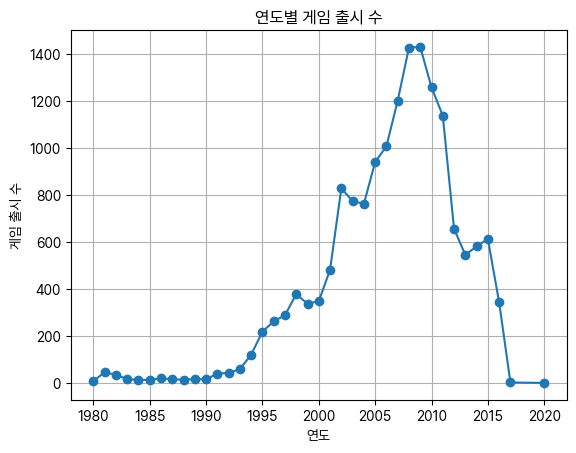

In [ ]:
# sort_index() : 행 인덱스 기준으로 정렬(오름차순). 데이터프레임인 경우 axis=1 열 인덱스 기준으로 정렬 가능.
size_by_year = df.groupby('Year').size().sort_index()

# 선 그래프
import matplotlib.pyplot as plt

plt.rc('font', family='Pretendard')

plt.figure()
size_by_year.plot(kind='line', marker='o')
plt.title('연도별 게임 출시 수')
plt.xlabel('연도')
plt.ylabel('게임 출시 수')
plt.grid(True)
plt.show

문제 5. 플랫폼별 전 세계 판매량
- 플랫폼(Platform) 별로 Global_Sales를 합산하고, 판매량이 높은 순으로 TOP 10을 막대그래프로 시각화하시오.

<BarContainer object of 10 artists>

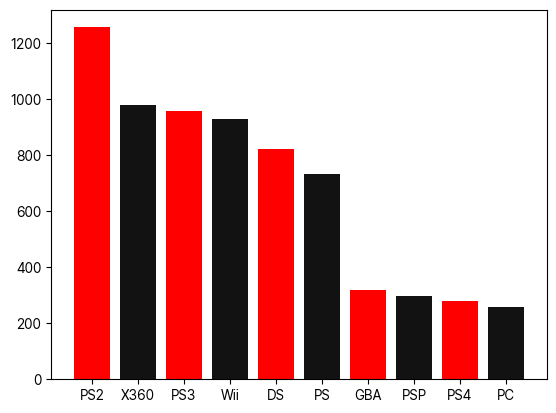

In [11]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
top10 = sales_by_platform.head(10)
top10

plt.figure()
# top10.plot(kind='bar')
plt.bar(top10.index, top10, color=['#ff0000','#121212'])

문제 6. 가장 많이 판매된 장르
- 장르별 Global_Sales 총합을 구해 가장 높은 장르를 찾으시오.
- 장르별 판매 비중을 파이차트로 시각화하시오.

Text(0.5, 1.0, '장르 별 글로벌 판매 비중 (Top6 + Ohters)')

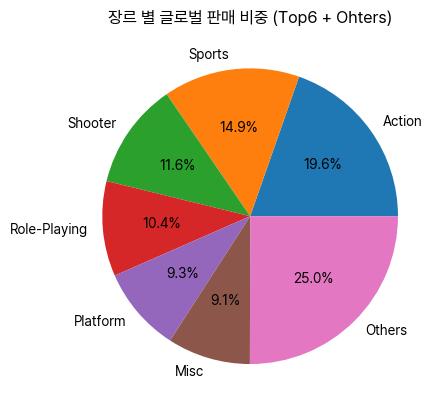

In [21]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# 파이 차트
# => 상위 6개 장르, 나머지는 Other
top6_genres = genre_sales.head(6)
others = genre_sales.iloc[6:].sum()

pie_values = top6_genres.tolist() + [others]
pie_labels = top6_genres.index.tolist() +['Others']

plt.figure()
plt.pie(pie_values, labels= pie_labels, autopct='%1.1f%%')
plt.title("장르 별 글로벌 판매 비중 (Top6 + Ohters)")

문제 7. Publisher 별 평균 판매량
- Publisher 별 평균 Global_Sales를 구하고, 상위 10개만 출력하시오.

In [ ]:
pub_mean = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
top10_pub_mean = pub_mean.head(10)
top10_pub_mean

# TODO: 최소 5개 이상 발매한 Publisher만 인정

Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.541337
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64

문제 8. 특정 Publisher 집중 분석
- `Nintendo` 또는 `Electronic Arts` 중 하나를 선택하여, 연도별 Global_Sales 추세를 선 그래프로 나타내시오.

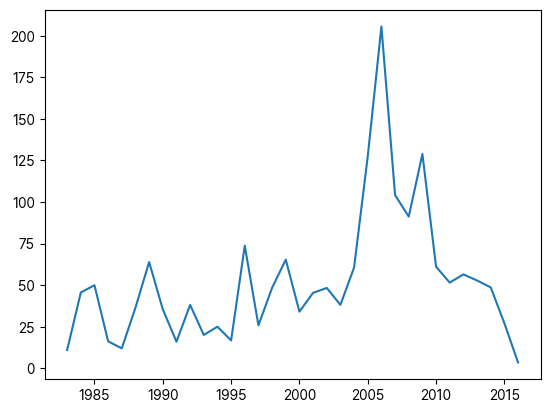

In [29]:
publisher = 'Nintendo'

pub_df = df[df['Publisher'] == publisher]

sales_by_year = pub_df.groupby('Year')['Global_Sales'].sum().sort_index()

plt.Figure
plt.plot(sales_by_year)

문제 9. Publisher 별 가장 많이 발매한 장르
- 각 Publisher가 가장 많이 만든 장르는 무엇인지 구하시오. (Publisher 별로 Genre count의 최대값 찾기)

[hint]
`groupby(['Publisher', 'Genre']).size().reset_index()`

문제 10. 지역별 판매량 비교
- NA_Sales, EU_Sales, JP_Sales, Other_Sales 전 세계 합을 비교하여 그래프로 표현하시오.

문제 11. 국가별로 인기 있는 장르
- NA / EU / JP 각각 판매량이 가장 높은 장르를 구하시오.

문제 12. 연도 + 장르 + 플랫폼 종합 분석
- 특정 장르를 선택하여 
    - 연도별 출시 수
    - 플랫폼별 판매량 TOP5 
    를 각각 그래프로 시각화 하시오
- 결과를 확인하여 해당 장르의 트렌드를 3문장으로 정리하시오.